In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT = os.getenv("LANGCHAIN_PROJECT")
LANGSMITH_TRACING="true"
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY= os.getenv("LANGSMITH_API_KEY")

In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="Gemma2-9b-It")

In [4]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from typing import Annotated, TypedDict
import operator
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

In [5]:
def multiply(a: int, b:int) -> int:
    """
    Multiply a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a * b

In [6]:
def add(a: int, b: int) -> int:
    """Adds a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a + b

In [7]:
def divide(a: int, b: int) -> float:
    """Divide a and b.
    
    Args: 
        a: first int
        b: second int
    """
    return a / b

In [8]:
search = DuckDuckGoSearchRun()

In [12]:
search.invoke("Who is the current president of USA?")

'The White House, official residence of the president of the United States. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of the United ... The president of the United States is the: U.S. head of state; Chief executive of the federal government; Commander-in-Chief of the armed forces; Current president. The 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025. Former U.S. presidents. The United States has had 46 former U ... Many suggested the system often behaves as though it\'s updated, until a stray comment about the current president—or the day\'s date—throws the illusion off. "It felt like the ultimate ... WASHINGTON − Donald Trump was sworn in Monday as the 47th pre

In [9]:
tools = [add, multiply, divide, search]

In [10]:
llm_with_tools = llm.bind_tools(tools)

In [11]:
# System Prompt
sys_msg = SystemMessage(content="You are a helpful assistant tasked with using search and performing arithematic operations")

In [12]:
def reasoner(state: MessagesState):
    return {"messages": [llm_with_tools.invoke([sys_msg] + state['messages'])]}

In [13]:
workflow = StateGraph(MessagesState)
workflow.add_node("reasoner", reasoner)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "reasoner")
workflow.add_conditional_edges("reasoner", tools_condition)
workflow.add_edge("tools", "reasoner")
react_graph = workflow.compile()

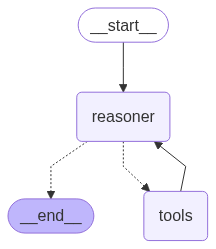

In [14]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [19]:
messages = [HumanMessage(content="What is the age of Elon Mask?")]
result = react_graph.invoke({"messages":messages})

In [21]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the age of Elon Mask?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_0q9r)
 Call ID: call_0q9r
  Args:
    query: age of elon musk
================================= Tool Message =================================
Name: duckduckgo_search

Error: UnboundLocalError("cannot access local variable 'results' where it is not associated with a value")
 Please fix your mistakes.
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_ppx9)
 Call ID: call_ppx9
  Args:
    query: age of elon musk
================================= Tool Message =================================
Name: duckduckgo_search

Error: UnboundLocalError("cannot access local variable 'results' where it is not associated with a value")
 Please fix your mistakes.
================================== Ai Message 

In [22]:
result

{'messages': [HumanMessage(content='What is the age of Elon Mask?', additional_kwargs={}, response_metadata={}, id='e35d3305-bc75-4d17-acb4-5ac66ae8e27d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0q9r', 'function': {'arguments': '{"query":"age of elon musk"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1413, 'total_tokens': 1500, 'completion_time': 0.158181818, 'prompt_time': 0.067328171, 'queue_time': 0.24843010799999998, 'total_time': 0.225509989}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--62cc42c4-21f4-49d2-abee-aa5ff3a6a2bc-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'age of elon musk'}, 'id': 'call_0q9r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1413, 'output_tokens': 87, 'total_tokens': 1500}),
  ToolMessage(content='Error: UnboundLocalError("can